In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_scenario_A_by_model(csv_path, model_order = ['AE', 'VAE', 'GANoma', 'DeepSVDD', 'DAGMM', 'SO_GAAL', 'LUNAR']):
    # Load the CSV
    df = pd.read_csv(csv_path)

    # Filter only scenario A
    df_a = df[df['scenario'] == 'A']

    # Iterate over each unique dataset
    for dataset in df_a['dataset'].unique():
        subset = df_a[df_a['dataset'] == dataset]

        # Melt for easier plotting with seaborn
        melted = subset.melt(
            id_vars=['model'],
            value_vars=['auc-PR', 'auc'],
            var_name='metric',
            value_name='score',
        )

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=melted, x='model', y='score', hue='metric',order=model_order, hue_order=['auc-PR', 'auc'])
        plt.title(f'Scenario A - {dataset}')
        plt.xlabel('Model')
        plt.ylabel('Score')
        plt.legend(title='Metric')
        plt.tight_layout()
        plt.grid()
        plt.show()
        
        
def plot_non_A_scenarios_by_metric(csv_path):
    # Load the CSV
    df = pd.read_csv(csv_path)

    # Filter out scenario A
    df_non_a = df[df['scenario'] != 'A']

    scenario_order = sorted(df_non_a['scenario'].unique())
    model_order = sorted(df_non_a['model'].unique())


    # For each dataset
    for dataset in df_non_a['dataset'].unique():
        dataset_df = df_non_a[df_non_a['dataset'] == dataset]

        for metric in ['auc-PR']:#, 'auc']:
            plt.figure(figsize=(10, 6))
            sns.boxplot(
                data=dataset_df,
                x='scenario',
                y=metric,
                hue='model',
                order=scenario_order,
                hue_order=model_order
            )
            plt.title(f'{metric} across Scenarios (excluding A) - {dataset}')
            plt.xlabel('Scenario')
            plt.ylabel(metric)
            plt.legend(title='Model')
            plt.tight_layout()
            plt.grid()
            plt.show()        

def plot_auc_scatter_with_regression(csv_path):
    # Load CSV
    df = pd.read_csv(csv_path)

    # Initialize FacetGrid for one scatter plot per model
    g = sns.FacetGrid(df, col="model", col_wrap=3, height=4, sharex=True, sharey=True)

    # Map scatterplot with regression line to each facet
    g.map_dataframe(sns.regplot, x="auc", y="auc-PR", scatter_kws={"s": 40}, line_kws={"color": "red"})

    # Add titles and labels
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("AUC", "AUC-PR")
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle("AUC-PR vs AUC with regression line per model")
    plt.grid()
    plt.show()



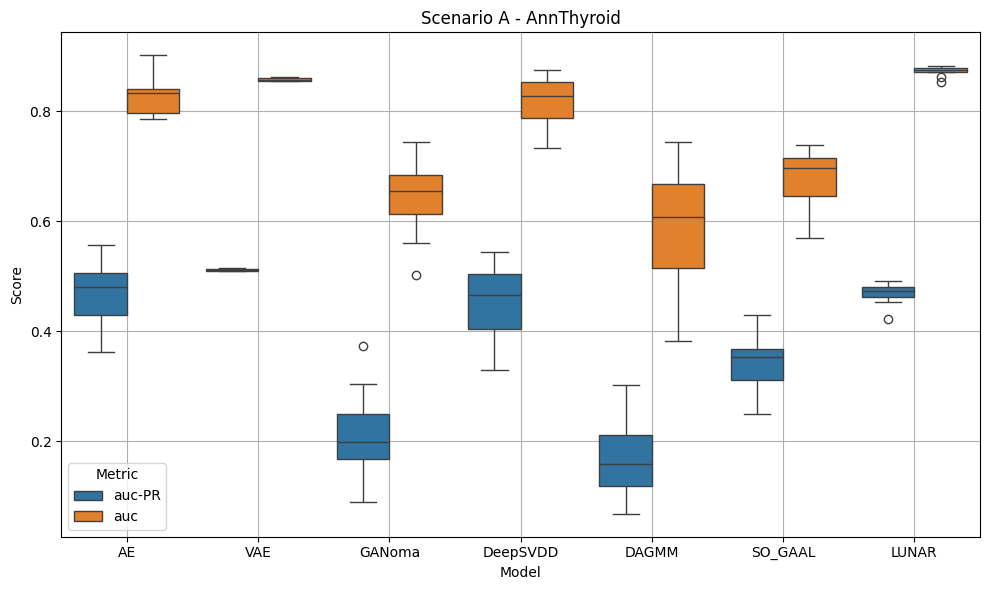

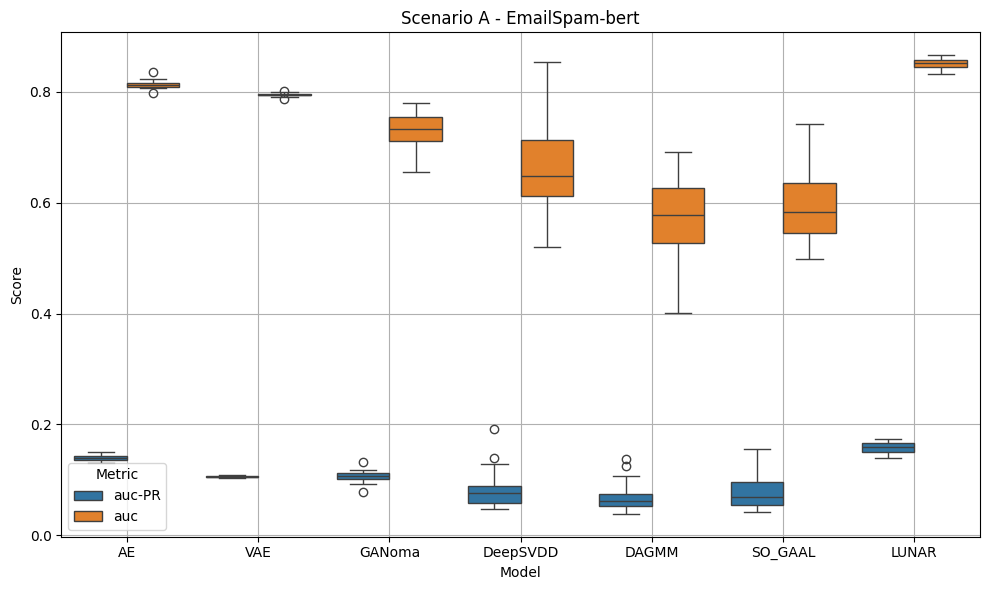

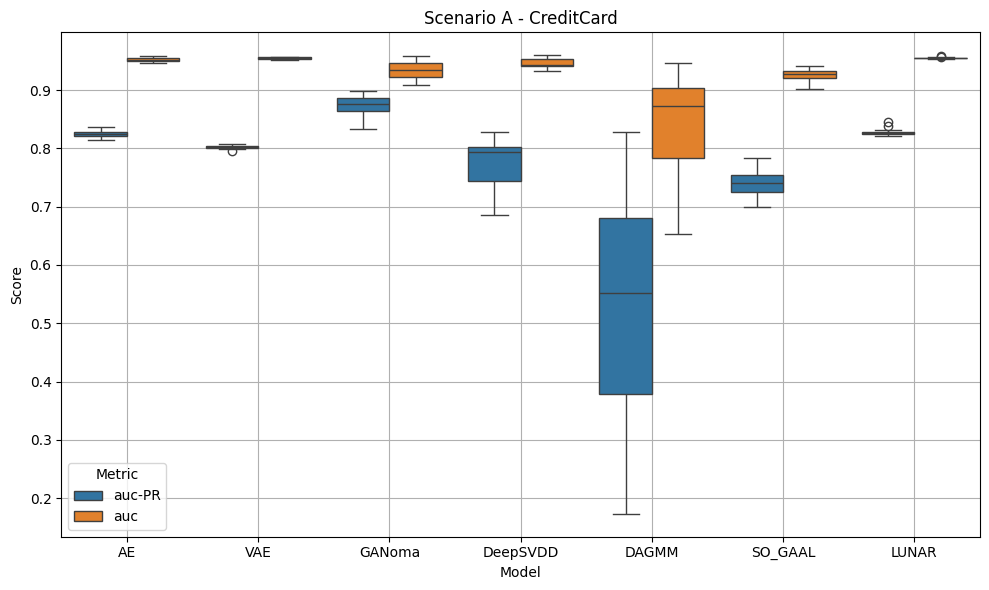

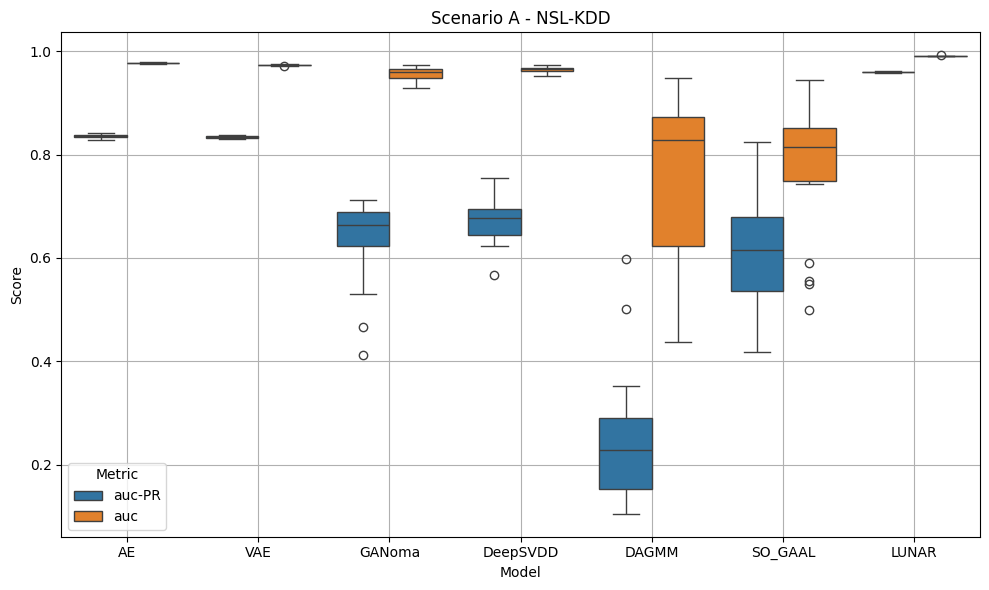

In [3]:
csv_file_path = 'experiment1_results.csv'

plot_scenario_A_by_model(csv_file_path)


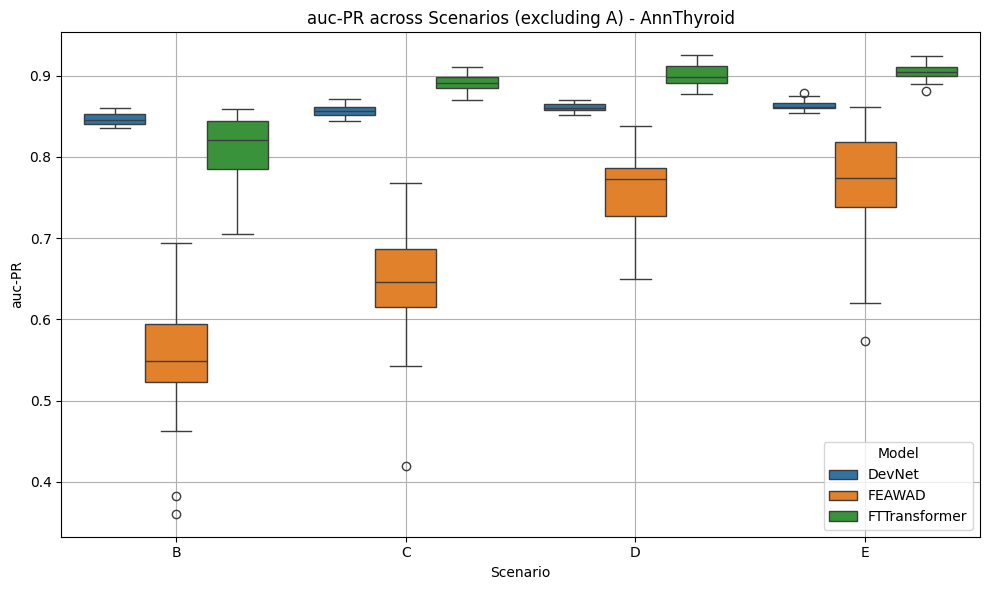

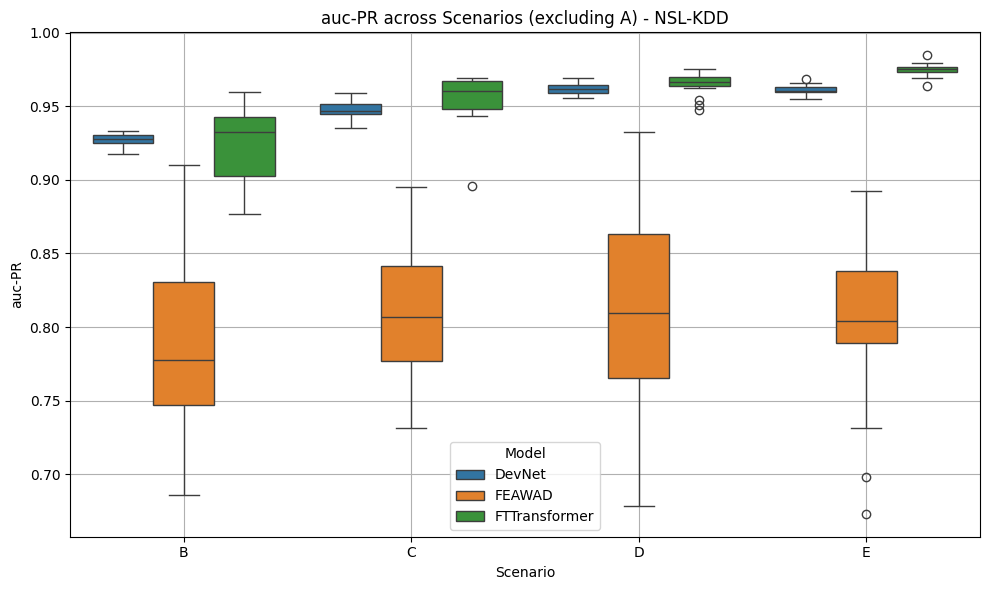

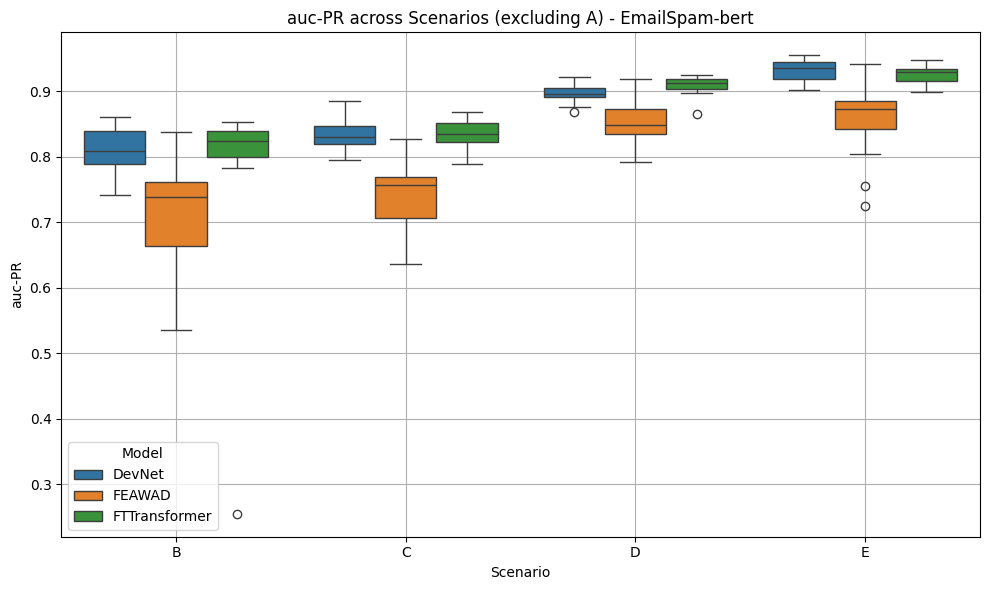

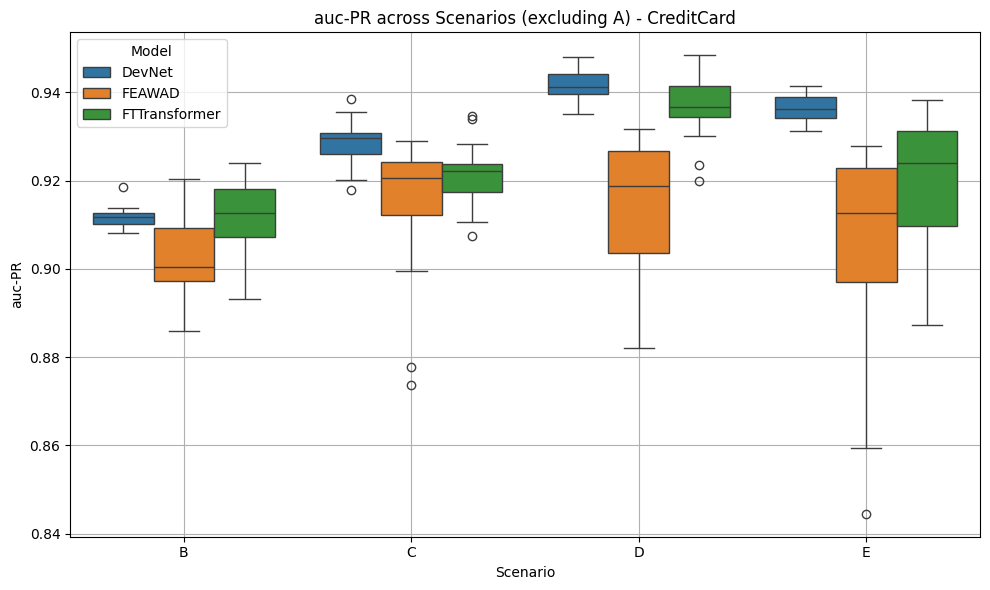

In [4]:
plot_non_A_scenarios_by_metric(csv_file_path)

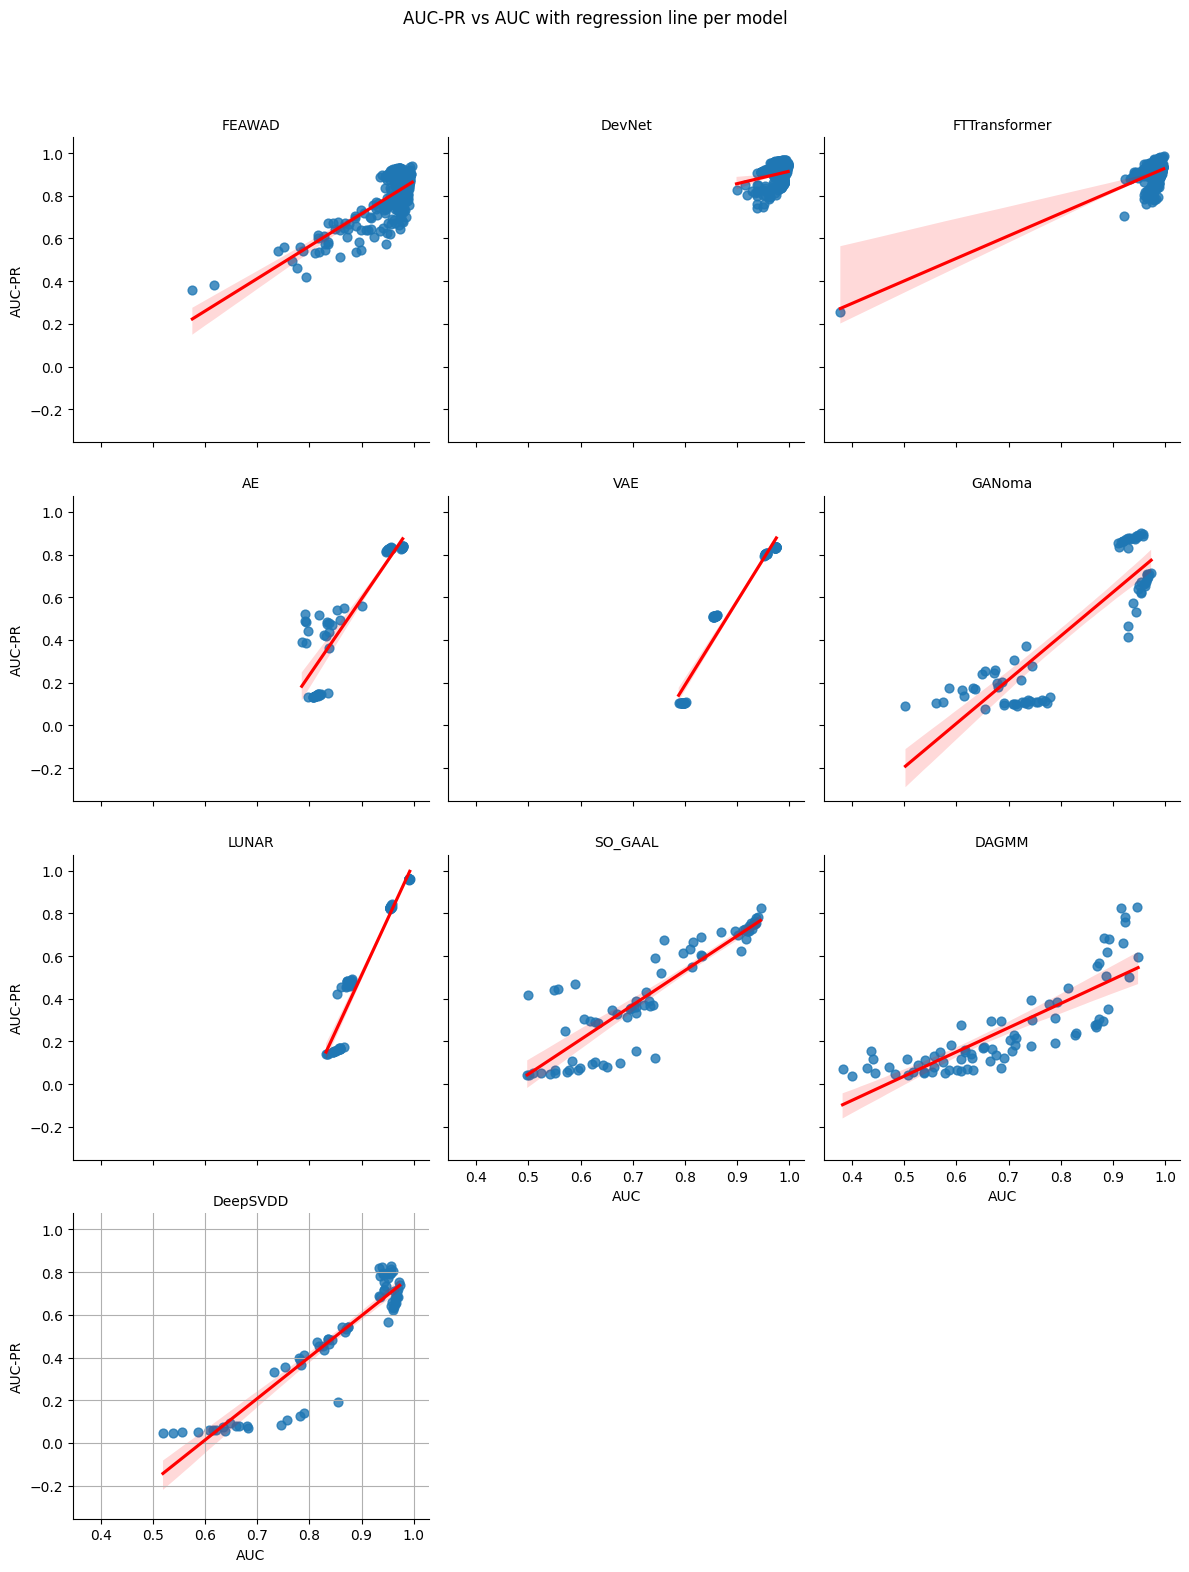

In [5]:
plot_auc_scatter_with_regression("experiment1_results.csv")


In [6]:
def plot_combined_auc_scatter_with_r2(csv_path):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    import numpy as np

    # Load CSV
    df = pd.read_csv(csv_path)
    df = df[df['scenario'] == 'A']

    # Set plot style
    sns.set(style="whitegrid")

    # Create color palette per model
    model_list = df['model'].unique()
    palette = sns.color_palette("husl", len(model_list))
    model_colors = dict(zip(model_list, palette))

    plt.figure(figsize=(10, 7))

    for model in model_list:
        model_df = df[df['model'] == model]
        x = model_df['auc'].values.reshape(-1, 1)
        y = model_df['auc-PR'].values

        # Fit regression
        if len(model_df) > 1:  # Need at least 2 points to fit line
            reg = LinearRegression().fit(x, y)
            y_pred = reg.predict(x)
            r2 = r2_score(y, y_pred)

            # Draw line
            x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
            plt.plot(x_range, reg.predict(x_range), color=model_colors[model])

            # Annotate R²
            # plt.text(
            #     x.min(), y.max(),
            #     f"R² {model}: {r2:.2f}",
            #     fontsize=9,
            #     color=model_colors[model]
            # )

        # Scatter plot
        plt.scatter(x, y, label=f"R² {model}: {r2:.2f}", color=model_colors[model], alpha=0.6, s=50)

    plt.title("AUC-PR vs AUC with regression lines and R² per model")
    plt.xlabel("AUC")
    plt.ylabel("AUC-PR")
    plt.legend(title="Model")
    plt.tight_layout()
    plt.grid()
    plt.ylim(0,1)
    plt.show()


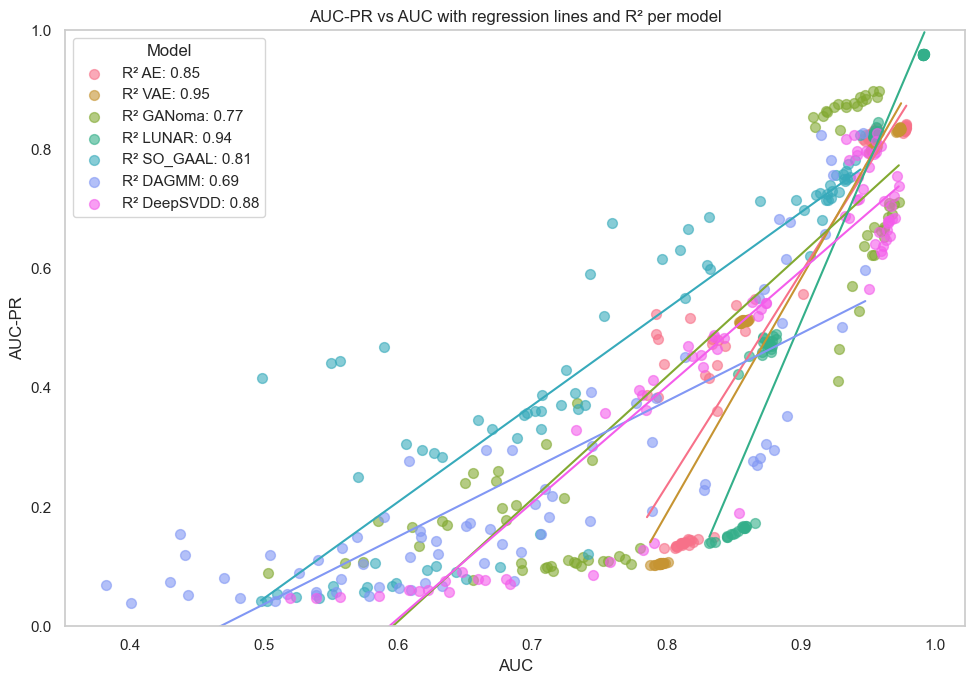

In [7]:
plot_combined_auc_scatter_with_r2("experiment1_results.csv")
